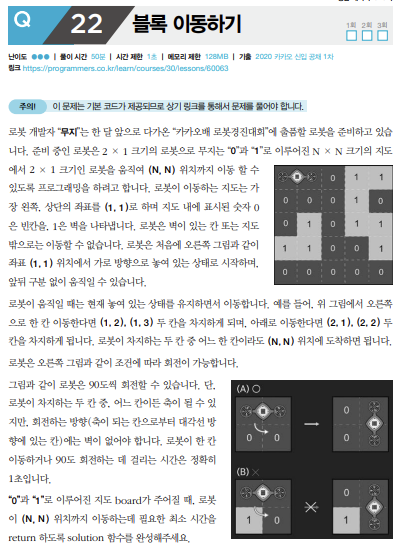

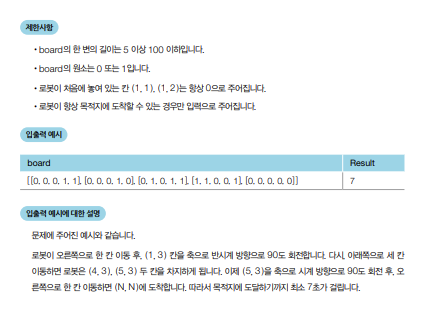

https://hz25.tistory.com/18

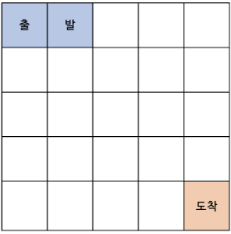

In [1]:
from collections import deque


def solution(board):
    # 보드 한 변의 길이
    N = len(board)
    
    # 방향 벡터 (하우상좌) >> 보통 상하좌우로 하는데ㅋㅋ
    drdc = [[1, 0], [0, 1], [-1, 0], [0, -1]]
    
    # (행1, 열1, 로봇이 놓인 방향, 이동 횟수)
    # 방향 - 0: 세로, 1: 가로
    # 위치값(행1, 열1)은 행이나 열이 더 작은 값을 갖는다.
    queue = deque([(0, 0, 1, 0)])
    # (행1, 열1, 로봇이 놓인 방향)
    visited = set([(0, 0, 1)])

    while queue:
        r1, c1, robot_d, mv = queue.popleft()
        r2, c2 = r1 + drdc[robot_d][0], c1 + drdc[robot_d][1]

        # 목적지 도착
        if r2 == N - 1 and c2 == N - 1:
            return mv

        # 네 방향으로 이동
        for d in range(4):
            nr1, nc1 = r1 + drdc[d][0], c1 + drdc[d][1]
            nr2, nc2 = r2 + drdc[d][0], c2 + drdc[d][1]

            # 보드를 벗어나지 않는 범위로만 이동
            if 0 <= nr1 < N and 0 <= nc1 < N and 0 <= nr2 < N and 0 <= nc2 < N:
                # 이미 방문했거나 한 칸이라도 벽인 경우에는 이동하지 않음
                if (nr1, nc1, robot_d) in visited or board[nr1][nc1] == 1 or board[nr2][nc2] == 1:
                    continue

                # 현재 방향을 유지한채로 상하좌우로 이동
                queue.append((nr1, nc1, robot_d, mv + 1))
                visited.add((nr1, nc1, robot_d))

                # 회전
                rotated_d = robot_d ^ 1
                # 로봇 세로 + 오른쪽으로 회전, 로봇 가로 + 아래쪽으로 회전
                if robot_d + d == 1:
                    if (r1, c1, rotated_d) not in visited:
                        queue.append((r1, c1, rotated_d, mv + 1))
                        visited.add((r1, c1, rotated_d))
                    if (r2, c2, rotated_d) not in visited:
                        queue.append((r2, c2, rotated_d, mv + 1))
                        visited.add((r2, c2, rotated_d))
                # 로봇 세로 + 왼쪽으로 회전, 로봇 가로 + 위쪽으로 회전
                elif robot_d + d == 3:
                    if (nr1, nc1, rotated_d) not in visited:
                        queue.append((nr1, nc1, rotated_d, mv + 1))
                        visited.add((nr1, nc1, rotated_d))
                    if (nr2, nc2, rotated_d) not in visited:
                        queue.append((nr2, nc2, rotated_d, mv + 1))
                        visited.add((nr2, nc2, rotated_d))

    return -1

In [2]:
board = [ [0, 0, 0, 1, 1]
         ,[0, 0, 0, 1, 0]
         ,[0, 1, 0, 1, 1]
         ,[1, 1, 0, 0, 1]
         ,[0, 0, 0, 0, 0] ]

solution(board)

7

## 답지 ver

In [3]:
from collections import deque

def get_next_pos(pos, board):
    next_pos = [] # 반환 결과 (이동 가능한 위치들)
    pos = list(pos) # 현재 위치 정보를 리스트로 변환 (집합 → 리스트)
    pos1_x, pos1_y, pos2_x, pos2_y = pos[0][0], pos[0][1], pos[1][0], pos[1][1]
    # (상, 하, 좌, 우)로 이동하는 경우에 대해서 처리
    dx = [-1, 1, 0, 0]
    dy = [0, 0, -1, 1]
    for i in range(4):
        pos1_next_x, pos1_next_y, pos2_next_x, pos2_next_y = pos1_x + dx[i], pos1_y + dy[i], pos2_x + dx[i], pos2_y + dy[i]
        # 이동하고자 하는 두 칸이 모두 비어 있다면
        if board[pos1_next_x][pos1_next_y] == 0 and board[pos2_next_x][pos2_next_y] == 0:
            next_pos.append({(pos1_next_x, pos1_next_y), (pos2_next_x, pos2_next_y)})
    # 현재 로봇이 가로로 놓여 있는 경우
    if pos1_x == pos2_x:
        for i in [-1, 1]: # 위쪽으로 회전하거나, 아래쪽으로 회전
            if board[pos1_x + i][pos1_y] == 0 and board[pos2_x + i][pos2_y] == 0: # 위쪽 혹은 아래쪽 두 칸이 모두 비어 있다면
                next_pos.append({(pos1_x, pos1_y), (pos1_x + i, pos1_y)})
                next_pos.append({(pos2_x, pos2_y), (pos2_x + i, pos2_y)})
    # 현재 로봇이 세로로 놓여 있는 경우
    elif pos1_y == pos2_y:
        for i in [-1, 1]: # 왼쪽으로 회전하거나, 오른쪽으로 회전
            if board[pos1_x][pos1_y + i] == 0 and board[pos2_x][pos2_y + i] == 0: # 왼쪽 혹은 오른쪽 두 칸이 모두 비어 있다면
                next_pos.append({(pos1_x, pos1_y), (pos1_x, pos1_y + i)})
                next_pos.append({(pos2_x, pos2_y), (pos2_x, pos2_y + i)})
    # 현재 위치에서 이동할 수 있는 위치를 반환
    return next_pos

def solution(board):
    # 맵의 외곽에 벽을 두는 형태로 맵 변형
    n = len(board)
    new_board = [[1] * (n + 2) for _ in range(n + 2)]
    for i in range(n):
        for j in range(n):
            new_board[i + 1][j + 1] = board[i][j]
    # 너비 우선 탐색(BFS) 수행
    q = deque()
    visited = []
    pos = {(1, 1), (1, 2)} # 시작 위치 설정
    q.append((pos, 0)) # 큐에 삽입한 뒤에
    visited.append(pos) # 방문 처리
    # 큐가 빌 때까지 반복
    while q:
        pos, cost = q.popleft()
        # (n, n) 위치에 로봇이 도달했다면, 최단 거리이므로 반환
        if (n, n) in pos:
            return cost
        # 현재 위치에서 이동할 수 있는 위치 확인
        for next_pos in get_next_pos(pos, new_board):
            # 아직 방문하지 않은 위치라면 큐에 삽입하고 방문 처리
            if next_pos not in visited:
                q.append((next_pos, cost + 1))
                visited.append(next_pos)
    return 0

In [4]:
board = [ [0, 0, 0, 1, 1]
         ,[0, 0, 0, 1, 0]
         ,[0, 1, 0, 1, 1]
         ,[1, 1, 0, 0, 1]
         ,[0, 0, 0, 0, 0] ]

solution(board)

7